# Acquisition Analytics: Bank Marketing

## Objective
- Reduce the customer acquisition cost (CAC) by targetting the ones who are likely to buy and to improve the response rate, i.e., identify and classify the prospects that respond the best to the marketing campaign.
- The classification goal is to predict if the client will subscribe (yes/no) a term deposit.

In [ ]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook configurations
%matplotlib inline
sns.set_style('whitegrid')
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columns

# supress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Description

## Source
- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
- [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data Set Information:
- The data is related with direct marketing campaigns of a Portuguese banking institution. 
- The marketing campaigns were based on phone calls. 
- Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### There are four datasets:
1. ***bank-additional-full.csv*** : with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2. ***bank-additional.csv*** : with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3. ***nk-full.csv*** : with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4. ***bank.csv*** : with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

#### NOTE
- We will utilize the bank-additional-full.csv dataset for this analysis.
- The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).




## Attribute Information:

### Input variables:

#### bank client data:
1. ***age*** (numeric)
2. ***job*** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. ***marital*** : marital status (categorical): 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
4. ***education*** (categorical) : 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
5. ***default*** : has credit in default? (categorical: 'no','yes','unknown')
6. ***housing*** : has housing loan? (categorical: 'no','yes','unknown')
7. ***loan*** : has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8. ***contact*** : contact communication type (categorical: 'cellular','telephone')
9. ***month*** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. ***day_of_week*** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. ***duration*** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12. ***campaign*** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. ***pdays*** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. ***previous*** : number of contacts performed before this campaign and for this client (numeric)
15. ***poutcome*** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16. ***emp.var.rate*** : employment variation rate - quarterly indicator (numeric)
17. ***cons.price.idx*** : consumer price index - monthly indicator (numeric)
18. ***cons.conf.idx*** : consumer confidence index - monthly indicator (numeric)
19. ***euribor3m*** : euribor 3 month rate - daily indicator (numeric)
20. ***nr.employed*** : number of employees - quarterly indicator (numeric)

## Output variable (desired target):
21. ***response*** - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Banking and Financial Services/Acquisition Analytics/My work/bank_marketing.csv", sep=',')

# Explore dataset

In [ ]:
# preview dataset
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0           1.1          93.994          -36.4      4.857       5191.0   
1           1.1          93.994          -36.4      4.857       5191.0   
2           1.1          93.994          -36.4      4.857       5191.0   
3           1.1          93.994          -36.4      4.857       5191.0   
4           1.1          93.994          -36.4      4.857       5191.0   

  response  
0       no  
1       no  
2       no  
3       no  
4       no

In [ ]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
41183  cellular   nov         fri       334         1    999         0   
41184  cellular   nov         fri       383         1    999         0   
41185  cellular   nov         fri       189         2    999         0   
41186  cellular   nov         fri       442         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed response  
41183       4963.6      yes  
41184       4963.6       no  
41185       4963.6       no  
41186       4963.6      yes  
41187       4963.6       no

- `response` is our target variable
- which has simple `yes` and `no` records

In [ ]:
# size of dataset
print("# Rows:", df.shape[0])
print("# Cols:", df.shape[1])

# Rows: 41188
# Cols: 21


In [ ]:
# check all features
for i in df.columns: print(i)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
response


In [ ]:
# metadata - dataset makeup and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- dataset has a mix of categorical and numeircal features
- categorical features must be encoded into numerical records for modelling
- dataset has no missing records, however, we have seen in data description that there are a few features with `unknown` records as well, which will be required to be treated appropriately
  - `unknown` records correspond to missing values

In [ ]:
# check missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

- dataset has no missing records, however, we have seen in data description that there are a few features with unknown records as well, which will be required to be treated appropriately

## Feature Engineering

- on target variable



In [ ]:
# create a copy of the original dataset
df1 = df.copy()

#### `response`
- this feature is the target variable

In [ ]:
df['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

- encode the `yes` & `no` to numerical values

In [ ]:
# mapping dictionary
yes_no_mapper = {
    'yes':1,
    'no':0
}
# encode values
df['response'] = df['response'].map(yes_no_mapper)

In [ ]:
df['response'].value_counts()  #  successfully mapped

0    36548
1     4640
Name: response, dtype: int64

In [ ]:
# calculate the distribution of the `response` feature
print(f"Percentage of positive response: {((df['response'].sum()/df.shape[0])*100).round(2)} %")

Percentage of positive response: 11.27 %


- therefore, this is a highly imbalanced dataset

In [ ]:
'''
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
import pickle
df.to_pickle('data_for_eda.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))
'''

# Exploratory Data Analysis

## Bank client data
We will first analyse the client data

1. ***age*** (numeric)
2. ***job*** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. ***marital*** : marital status (categorical): 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
4. ***education*** (categorical) : 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
5. ***default*** : has credit in default? (categorical: 'no','yes','unknown')
6. ***housing*** : has housing loan? (categorical: 'no','yes','unknown')
7. ***loan*** : has personal loan? (categorical: 'no','yes','unknown')

---
### `age`
- age of prospects

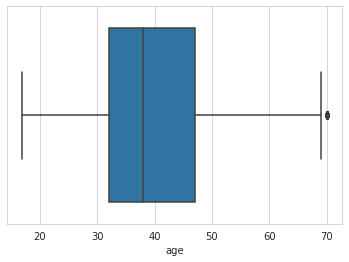

In [ ]:
# create boxplot to see distribution
sns.boxplot(df['age'])

- outliers are present for age > 70
- let's club all ages greater than 70 to 70

In [ ]:
# impute outliers
df['age'][df['age']>70] = 70

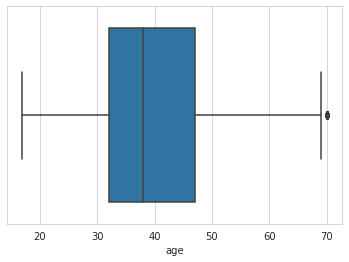

In [ ]:
# check distribution
sns.boxplot(df['age'])

#### Cohort analysis on age groups
- it is a standard practice to convert `age` into a categorical feature from a numerical feature by dividing it into different age brackets (or bins) 
- we can then calculate the response rate for each age bin and see which age group has responded the best to our marketing campaign

In [ ]:
# cohort analysis on age groups

# bucket the age into groups of 10
bins = np.arange(10, df['age'].max() +10, 10)  # create bins
df['age_bins'] = pd.cut(df['age'], bins, include_lowest=True)

In [ ]:
# preview dataset
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0           1.1          93.994          -36.4      4.857       5191.0   
1           1.1          93.994          -36.4      4.857       5191.0   
2           1.1          93.994          -36.4      4.857       5191.0   
3           1.1          93.994          -36.4      4.857       5191.0   
4           1.1          93.994          -36.4      4.857       5191.0   

   response      age_bins  
0         0  (50.0, 60.0]  
1         0  (50.0, 60.0]  
2         0  (30.0, 40.0]  
3         0  (30.0, 40.0]  
4         0  (50.0, 60.0]

In [ ]:
# prospects contacted by age group
prospects_contacted_age = df.groupby('age_bins')['response'].count().reset_index(name = 'prospects_contacted_age')
# prospects responded positively by age group
prospects_responded_age = df[df['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'prospects_responded_age')
# merge above into a single dataframe
cohort_age_group = prospects_contacted_age.merge(prospects_responded_age, on='age_bins')
# calculate response rate for each age group
cohort_age_group['response_rate'] = ((cohort_age_group['prospects_responded_age'] / cohort_age_group['prospects_contacted_age'])*100).round(2)

In [ ]:
# preview cohort analysis
cohort_age_group

age_bins  prospects_contacted_age  prospects_responded_age  \
0  (9.999, 20.0]                      140                       57   
1   (20.0, 30.0]                     7243                     1067   
2   (30.0, 40.0]                    16385                     1597   
3   (40.0, 50.0]                    10240                      837   
4   (50.0, 60.0]                     6270                      668   
5   (60.0, 70.0]                      910                      414   

   response_rate  
0          40.71  
1          14.73  
2           9.75  
3           8.17  
4          10.65  
5          45.49

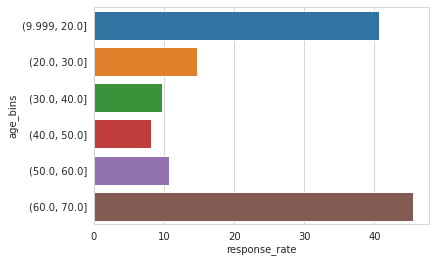

In [ ]:
# plot response rate by age groups
sns.barplot(x = cohort_age_group['response_rate'], y=cohort_age_group['age_bins'])

- the youngest and the oldest are the biggest responders
- the top 3 highest responding age groups are
  1. 60-70
  2. 10-20
  3. 20-30
- however, since the data is not equally distributed across the age groups, there can be a bias towards certain age groups



---




### `job`
- type of job

In [ ]:
# preview feature - distribution
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

#### Cohort analysis on job types
- the feature is distributed against different types of jobs
- we have some missing data as `unknown` records
- we can assume that people who are well-off in their lives have greater probability of buying a term deposit
- let us explore further

In [ ]:
# prospects contacted by job type
prospects_contacted_job = df.groupby('job')['response'].count().reset_index(name='prospects_contacted_job')
# prospects responded positively by job type
prospects_responded_job = df[df['response']==1].groupby('job')['response'].count().reset_index(name='prospects_responded_job')
# merge above into a single dataframe
cohort_job_type = prospects_contacted_job.merge(prospects_responded_job, on='job')
# response rate
cohort_job_type['response_rate'] = ((cohort_job_type['prospects_responded_job']/cohort_job_type['prospects_contacted_job'])*100).round(2)

In [ ]:
cohort_job_type

job  prospects_contacted_job  prospects_responded_job  \
0          admin.                    10422                     1352   
1     blue-collar                     9254                      638   
2    entrepreneur                     1456                      124   
3       housemaid                     1060                      106   
4      management                     2924                      328   
5         retired                     1720                      434   
6   self-employed                     1421                      149   
7        services                     3969                      323   
8         student                      875                      275   
9      technician                     6743                      730   
10     unemployed                     1014                      144   
11        unknown                      330                       37   

    response_rate  
0           12.97  
1            6.89  
2            8.52  
3           10.00  
4           11.22  
5           25.23  
6           10.49  
7            8.14  
8           31.43  
9           10.83  
10          14.20  
11          11.21

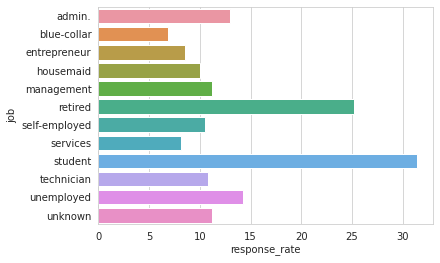

In [ ]:
# plot distribution
sns.barplot(data=cohort_job_type, x='response_rate', y='job')

- similar to age group analysis, the youngest and the eldest are the best responders
- top 3 job types with best response rate
  1. `students`
  2. `retired`
  3. `unemployed` and `admin`
- for students, we can assume it is their parents who are investing in the term deposits for them, the following could a reason
  - to save taxes
  - terms deposits for students is comparitively cheaper

In [ ]:
cohort_job_type['response_rate'].sort_values(ascending=False).index

Int64Index([8, 5, 10, 0, 4, 11, 9, 6, 3, 2, 7, 1], dtype='int64')

---
### `marital`
- marital status

In [ ]:
# preview feature distribution
df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

- we have some missing records - `unknown`
- since there are only 80 records that are missing, we will map them to the biggest group, i.e. `married`
  - as their can be only 3 types of marital statuses

In [ ]:
# feature mapping
df['marital'][df['marital']=='unknown'] = 'married'

In [ ]:
# preview feature distribution
df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

#### Cohort analysis on marital status
- we can assume that married prospects can be more probable to buy the term deposit due to family responsibilities
- let us explore

In [ ]:
# prospects contacted by marital status
prospects_contacted_marital = df.groupby('marital')['response'].count().reset_index(name='prospects_contacted_marital')
# prospects responded positively
prospects_responded_marital = df[df['response']==1].groupby('marital')['response'].count().reset_index(name='prospects_responded_marital')
# merge above into single dataframe
cohort_marital_status = prospects_contacted_marital.merge(prospects_responded_marital, on='marital')
# calculate response rate for each marital status
cohort_marital_status['response_rate'] = ((cohort_marital_status['prospects_responded_marital']/cohort_marital_status['prospects_contacted_marital'])*100).round(2)

In [ ]:
# previer cohot
cohort_marital_status

marital  prospects_contacted_marital  prospects_responded_marital  \
0  divorced                         4612                          476   
1   married                        25008                         2544   
2    single                        11568                         1620   

   response_rate  
0          10.32  
1          10.17  
2          14.00

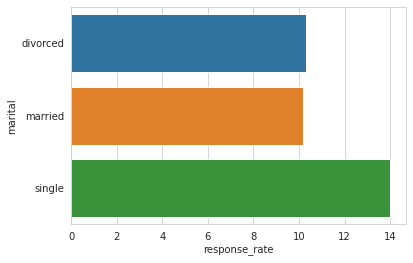

In [ ]:
# plot cohort distribution
sns.barplot(data=cohort_marital_status, x='response_rate', y='marital')

- all 3 marital status have similar response rates
- `single` has highest response rate
- since the 3 response rates do not vary a lot therefore, we should not give very high importance to the `marital` feature while modelling


**NOTE**: We can notice a correlation between high response rate of single prospects and that of younger prospects

---
### `education`
- the level of education of the prospects

In [ ]:
# preview feature distribution
df['education'].value_counts()

primary_education      12531
tertiary_education     12168
secondary_education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

- number of missing values are very significant, therefore we will not impute them at the moment
- we can however, club the different education levels to simplify the distribution

In [ ]:
# simplify distribution in 'education'
df.replace({
    'education':{
        'university.degree':'tertiary_education',
        'high.school':'secondary_education',
        'basic.9y':'primary_education',
        'basic.4y':'primary_education',
        'basic.6y':'primary_education',
        'illiterate':'primary_education'
    }
}, inplace=True)

In [ ]:
# preview feature distribution
df['education'].value_counts()

primary_education      12531
tertiary_education     12168
secondary_education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

#### Cohort Analysis on Level of Education
- we can assume that highly educated prospects are more likely to buy the term deposit
- and the parents of students can also buy for them as we've seen it earlier
- let us explore further

In [ ]:
# number of prospects contacted by level of education
prospects_contacted_education = df.groupby('education')['response'].count().reset_index(name='prospects_contacted_education')
# number of prospects responded by level of education
prospects_responded_education = df[df['response']==1].groupby('education')['response'].count().reset_index(name='prospects_responded_education')
# merge above into dataframe
cohort_education = prospects_contacted_education.merge(prospects_responded_education, on='education')
# calculate response rate for each level of education
cohort_education['response_rate'] = ((cohort_education['prospects_responded_education']/cohort_education['prospects_contacted_education'])*100).round(2)

In [ ]:
# preview cohort
cohort_education

education  prospects_contacted_education  \
0    primary_education                          12531   
1  professional.course                           5243   
2  secondary_education                           9515   
3   tertiary_education                          12168   
4              unknown                           1731   

   prospects_responded_education  response_rate  
0                           1093           8.72  
1                            595          11.35  
2                           1031          10.84  
3                           1670          13.72  
4                            251          14.50

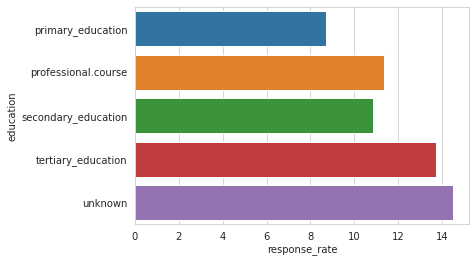

In [ ]:
# plot cohort
sns.barplot(data=cohort_education, x='response_rate', y='education')

- prospects with `tertiary_education` and `professional_course` are more probable of converting
- however, it is not significantly higher than the others
- therefore, this feature may not offer a lot of insights into modelling






---


### `default`
- if the prospect has ever defaulted on their credit loans

In [ ]:
# preview feature distribution
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

- here the feature is distributed into yes and no, however, there are also 1-time defaults and 2-time default kind of subcategories that can be found in other datasets

#### Cohort Analysis on Credit Loan Defaults

In [ ]:
# number of prospects contacted by loan default
prospects_contacted_default = df.groupby('default')['response'].count().reset_index(name='prospects_contacted_default')
# number of prospects responded by loan default
prospects_responded_default = df[df['response']==1].groupby('default')['response'].count().reset_index(name='prospects_responded_default')
# merge above into dataframe
cohort_default = prospects_contacted_default.merge(prospects_responded_default, on='default')
# calculate response rate for each loan default
cohort_default['response_rate'] = ((cohort_default['prospects_responded_default']/cohort_default['prospects_contacted_default'])*100).round(2)

In [ ]:
# preview cohort
cohort_default

default  prospects_contacted_default  prospects_responded_default  \
0       no                        32588                         4197   
1  unknown                         8597                          443   

   response_rate  
0          12.88  
1           5.15

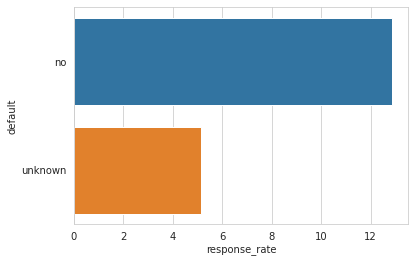

In [ ]:
# plot cohort distribution
sns.barplot(data=cohort_default, x='response_rate', y='default')

- prospects who have not defaulted have converted the most
- non-defaulters should definitely be considered for targetting for the next marketing campaign

---
### `housing`
- has housing loan?

In [ ]:
# preview feature distribution
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

#### Cohort Analysis on housing loan holders

In [ ]:
# number of prospects contacted by housing loan housing
prospects_contacted_housing = df.groupby('housing')['response'].count().reset_index(name='prospects_contacted_housing')
# number of prospects responded by housing loan housing
prospects_responded_housing = df[df['response']==1].groupby('housing')['response'].count().reset_index(name='prospects_responded_housing')
# merge above into dataframe
cohort_housing = prospects_contacted_housing.merge(prospects_responded_housing, on='housing')
# calculate response rate for each housing loan housing
cohort_housing['response_rate'] = ((cohort_housing['prospects_responded_housing']/cohort_housing['prospects_contacted_housing'])*100).round(2)

In [ ]:
# preview cohort
cohort_housing

housing  prospects_contacted_housing  prospects_responded_housing  \
0       no                        18622                         2026   
1  unknown                          990                          107   
2      yes                        21576                         2507   

   response_rate  
0          10.88  
1          10.81  
2          11.62

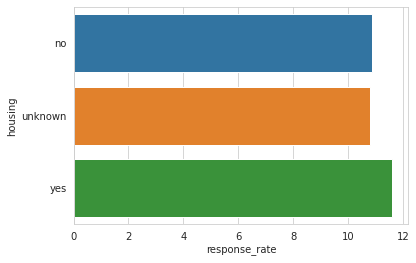

In [ ]:
# plot cohort distribution
sns.barplot(data=cohort_housing, x='response_rate', y='housing')

- each sub-category has similar response rate
- therefore, having a housing loan or not does not effect conversion

---
### `loan`
- has personal loan?

##### Difference between housing and personal loan
- housing loans have higher token amount
- housing loans have longer duration to payback the loan
- personal loans have higher interest rates

In [ ]:
# preview feature distribution
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

#### Cohort Analysis on Personal loan holders

In [ ]:
# number of prospects contacted by personal loan holders
prospects_contacted_loan = df.groupby('loan')['response'].count().reset_index(name='prospects_contacted_loan')
# number of prospects responded by personal loan holders
prospects_responded_loan = df[df['response']==1].groupby('loan')['response'].count().reset_index(name='prospects_responded_loan')
# merge above into dataframe
cohort_loan = prospects_contacted_loan.merge(prospects_responded_loan, on='loan')
# calculate response rate for each loan loan loan
cohort_loan['response_rate'] = ((cohort_loan['prospects_responded_loan']/cohort_loan['prospects_contacted_loan'])*100).round(2)

In [ ]:
# preview cohort
cohort_loan

loan  prospects_contacted_loan  prospects_responded_loan  response_rate
0       no                     33950                      3850          11.34
1  unknown                       990                       107          10.81
2      yes                      6248                       683          10.93

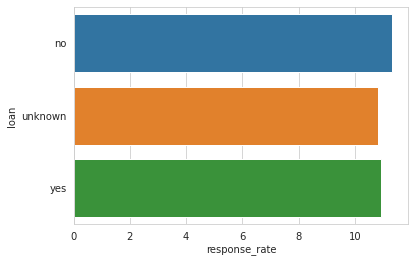

In [ ]:
# plot cohort distribution
sns.barplot(data=cohort_loan, x='response_rate', y='loan')

- each sub-category has similar response rate
- therefore, having a housing loan or not does not effect conversion

---
---
## Contact data
Now that we have analyzed the client data, we will now analyze the contact data
1. ****contact**** : contact communication type (categorical: 'cellular','telephone')
2. ****month*** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. ***day_of_week*** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
4. ***duration*** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

---
### `contact`
- contact communication type

In [ ]:
# preview feature distribution
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

#### Cohort Analysis on Contact Type

In [ ]:
# number of prospects contacted by contact type
prospects_contacted_contact = df.groupby('contact')['response'].count().reset_index(name='prospects_contacted_contact')
# number of prospects responded by contact type
prospects_responded_contact = df[df['response']==1].groupby('contact')['response'].count().reset_index(name='prospects_responded_contact')
# merge above into dataframe
cohort_contact = prospects_contacted_contact.merge(prospects_responded_contact, on='contact')
# calculate response rate for each contact type
cohort_contact['response_rate'] = ((cohort_contact['prospects_responded_contact']/cohort_contact['prospects_contacted_contact'])*100).round(2)

In [ ]:
# preview cohort
cohort_contact

contact  prospects_contacted_contact  prospects_responded_contact  \
0   cellular                        26144                         3853   
1  telephone                        15044                          787   

   response_rate  
0          14.74  
1           5.23

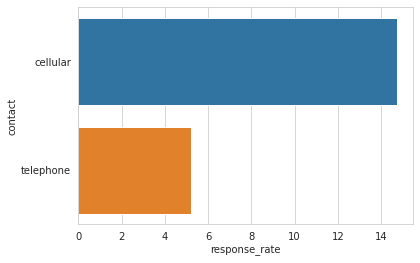

In [ ]:
# plot cohort
sns.barplot(data=cohort_contact, x='response_rate', y='contact')

- the prospects contacted on cellular phones have shown a much better response than the ones contacted on telephone
- since this dataset is from 2008, which was the year of the economic recession, we can conclude that the prospects operating on cellular phone were well off and could better afford the term plan
- therefore, this feature certainly will impact our output

---
### `month`
- last contact month of year 

In [ ]:
# preview feature distribution
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

#### Cohort Analysis on Month of Contact

In [ ]:
# number of prospects monthed by month of year
prospects_monthed_month = df.groupby('month')['response'].count().reset_index(name='prospects_monthed_month')
# number of prospects responded by month of year
prospects_responded_month = df[df['response']==1].groupby('month')['response'].count().reset_index(name='prospects_responded_month')
# merge above into dataframe
cohort_month = prospects_monthed_month.merge(prospects_responded_month, on='month')
# calculate response rate for each month of year
cohort_month['response_rate'] = ((cohort_month['prospects_responded_month']/cohort_month['prospects_monthed_month'])*100).round(2)

In [ ]:
# preview cohort
cohort_month

month  prospects_monthed_month  prospects_responded_month  response_rate
0   apr                     2632                        539          20.48
1   aug                     6178                        655          10.60
2   dec                      182                         89          48.90
3   jul                     7174                        649           9.05
4   jun                     5318                        559          10.51
5   mar                      546                        276          50.55
6   may                    13769                        886           6.43
7   nov                     4101                        416          10.14
8   oct                      718                        315          43.87
9   sep                      570                        256          44.91

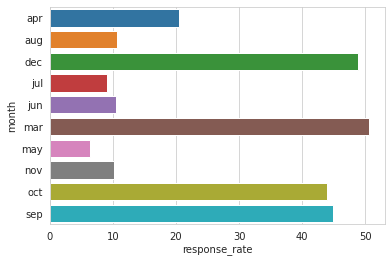

In [ ]:
# plot cohort
sns.barplot(data=cohort_month, x='response_rate', y='month')

- The highest conversions has been in the months of
  - `mar`
  - `dec`
  - `sep`
  - `oct`
- this may not be a highly significant feature from the statistical perspective, however, the bank can certainly run some experiments in these months to maximize conversions

---
### `day_of_week`
- last contact day of the week

In [ ]:
# preview feature distribution
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

- number of calls done each day are very similar

#### Cohort Analysis on Day of Week

In [ ]:
# number of prospects contacted by day
prospects_contacted_day = df.groupby('day_of_week')['response'].count().reset_index(name='prospects_contacted_day')
# number of prospects responded by day
prospects_responded_day = df[df['response']==1].groupby('day_of_week')['response'].count().reset_index(name='prospects_responded_day')
# merge above into dataframe
cohort_day = prospects_contacted_day.merge(prospects_responded_day, on='day_of_week')
# response rate by contact on day
cohort_day['response_rate'] = ((cohort_day['prospects_responded_day']/cohort_day['prospects_contacted_day'])*100).round(2)

In [ ]:
# preview cohort
cohort_day

day_of_week  prospects_contacted_day  prospects_responded_day  response_rate
0         fri                     7827                      846          10.81
1         mon                     8514                      847           9.95
2         thu                     8623                     1045          12.12
3         tue                     8090                      953          11.78
4         wed                     8134                      949          11.67

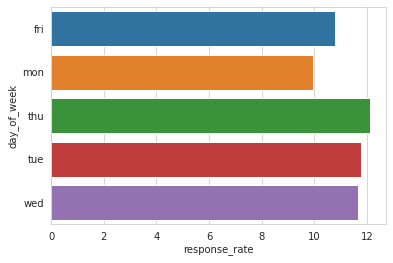

In [ ]:
# plot cohort performance
sns.barplot(data=cohort_day, x='response_rate', y='day_of_week')

- Monday has the lowest conversion rate
  - maybe due to the fact that it is the first day of the week and people are usually very busy then and not available for a call
- Similarly for Friday, as it is the last day of the week
- Thursday, then Tuesday and Wednesday certainly hit the sweet spot with the max conversions

---
### `duration`
- last contact duration, in seconds

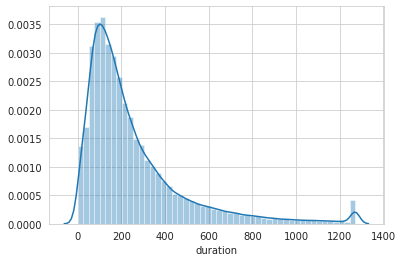

In [ ]:
# plot distribution
sns.distplot(df['duration'])

- heavily right skewed
- indicates that there are many outliers

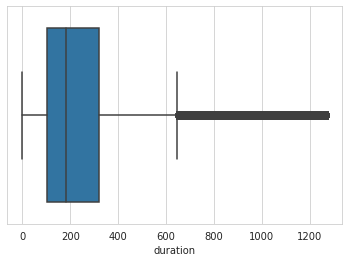

In [ ]:
# plot distribution
sns.boxplot(df['duration'])

- there seem to be many outliers
- let us check their values

In [ ]:
# feature description - stats
df['duration'].describe(percentiles = [0.25,0.5,0.75,0.95,0.99])

count    41188.000000
mean       254.349228
std        235.209110
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.000000
max       1271.000000
Name: duration, dtype: float64

- the 99th percentile is at 1271 and the maximum value is at 4918
- therefore, there certainly are many outliers that require treatment

In [ ]:
# impute outliers
df['duration'][df['duration'] > 1271] = 1271

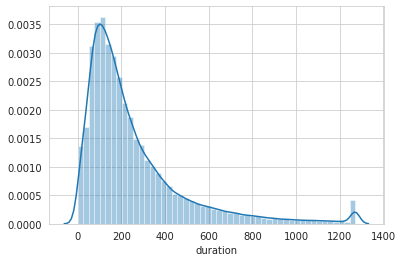

In [ ]:
# plot distribution
sns.distplot(df['duration'])

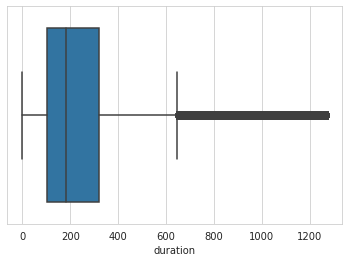

In [ ]:
# boxplot
sns.boxplot(df['duration'])

---
---
# Other attributes
1. ***campaign*** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. ***pdays*** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. ***previous*** : number of contacts performed before this campaign and for this client (numeric)
4. ***poutcome*** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

---
### `campaign`
- number of contacts performed during this campaign and for this client

In [ ]:
# preview feature distribution
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

- it looks like this feature has many outliers
- the high number of call attempts could be simply due to a non-responsive number
- let us explore further

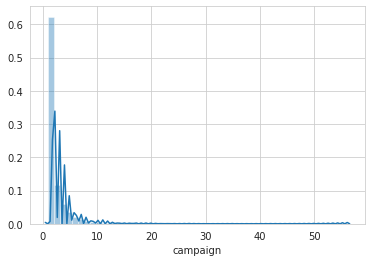

In [ ]:
# plot distribution
sns.distplot(df['campaign'])

- a right skewed plot as expected due to the outliers

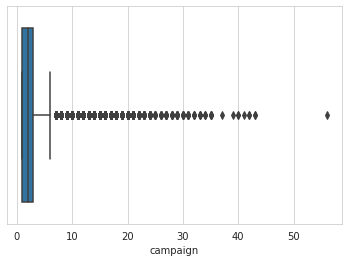

In [ ]:
# plot distributions
sns.boxplot(df['campaign'])

In [ ]:
# check outliers limit
df['campaign'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

- 99th percentile value is at 14 while the max value is at 56
- let us impute all outliers

In [ ]:
df['campaign'][df['campaign'] > 14] = 14

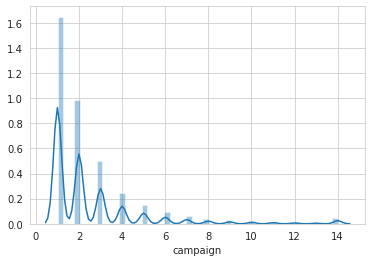

In [ ]:
# plot distribution
sns.distplot(df['campaign'])

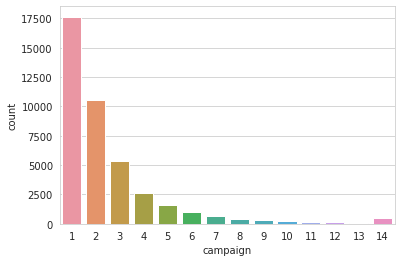

In [ ]:
# plot distribution
sns.countplot(df['campaign'])

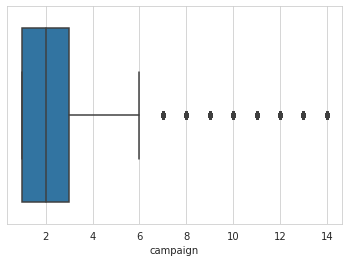

In [ ]:
# plot distributions
sns.boxplot(df['campaign'])

#### Cohort Analysis on number of contacts

In [ ]:
# number of prospects contacted by 'campaign'
prospects_contacted_campaign = df.groupby('campaign')['response'].count().reset_index(name='prospects_contacted_campaign')
# number of prospects converted by 'campaign'
prospects_responded_campaign = df[df['response']==1].groupby('campaign')['response'].count().reset_index(name='prospects_responded_campaign')
# merge above into dataframe
cohort_campaign = prospects_contacted_campaign.merge(prospects_responded_campaign, on='campaign')
# conversion rate by 'campaign'
cohort_campaign['response_rate'] = ((cohort_campaign['prospects_responded_campaign']/cohort_campaign['prospects_contacted_campaign'])*100).round(2)

In [ ]:
# preview cohort
cohort_campaign

campaign  prospects_contacted_campaign  prospects_responded_campaign  \
0          1                         17642                          2300   
1          2                         10570                          1211   
2          3                          5341                           574   
3          4                          2651                           249   
4          5                          1599                           120   
5          6                           979                            75   
6          7                           629                            38   
7          8                           400                            17   
8          9                           283                            17   
9         10                           225                            12   
10        11                           177                            12   
11        12                           125                             3   
12        13                            92                             4   
13        14                           475                             8   

    response_rate  
0           13.04  
1           11.46  
2           10.75  
3            9.39  
4            7.50  
5            7.66  
6            6.04  
7            4.25  
8            6.01  
9            5.33  
10           6.78  
11           2.40  
12           4.35  
13           1.68

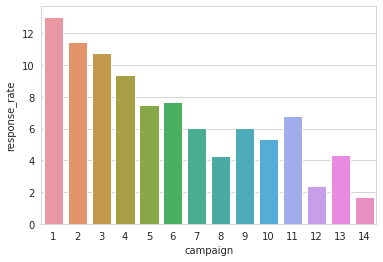

In [ ]:
# plot cohort performance
sns.barplot(data=cohort_campaign, y='response_rate', x='campaign')

- the response rate is decreasing with the more number of calls
- it could be concluded that if the customer has understood the product in the first few times then there is high conversion probability

---
### `pdays`
- number of days that passed by after the client was last contacted from a previous campaign
- gap after last contact

In [ ]:
# preview feature distribution
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

- no. of people contacted today = 0
- no. of prospects contacted yesterday = 1
- max # prospects haven't been contacted the second time = 999

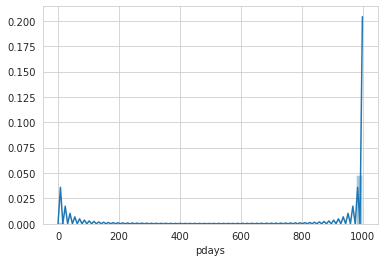

In [ ]:
# plot distribution
sns.distplot(df['pdays'])

- let us transform this feature into different buckets for better analysis

In [ ]:
# feature transformation
df['pdays'][df['pdays'].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])] = 'contacted_within_10_days'
df['pdays'][df['pdays'].isin([999])] = 'contacted_only_once'
df['pdays'][~df['pdays'].isin(['contacted_within_10_days', 'contacted_only_once'])] = 'contacted_after_10_days'

In [ ]:
# feature distribution
df['pdays'].value_counts()

contacted_only_once         39673
contacted_within_10_days     1311
contacted_after_10_days       204
Name: pdays, dtype: int64

#### Cohort Analysis on Gap after first contact


In [ ]:
# number of prospects contacted by 'pdays'
prospects_contacted_pdays = df.groupby('pdays')['response'].count().reset_index(name='prospects_contacted_pdays')
# number of prospects converted by 'pdays'
prospects_responded_pdays = df[df['response']==1].groupby('pdays')['response'].count().reset_index(name='prospects_responded_pdays')
# merge above into dataframe
cohort_pdays = prospects_contacted_pdays.merge(prospects_responded_pdays, on='pdays')
# conversion rate by 'pdays'
cohort_pdays['response_rate'] = ((cohort_pdays['prospects_responded_pdays']/cohort_pdays['prospects_contacted_pdays'])*100).round(2)

In [ ]:
# preview cohort
cohort_pdays

pdays  prospects_contacted_pdays  \
0   contacted_after_10_days                        204   
1       contacted_only_once                      39673   
2  contacted_within_10_days                       1311   

   prospects_responded_pdays  response_rate  
0                        116          56.86  
1                       3673           9.26  
2                        851          64.91

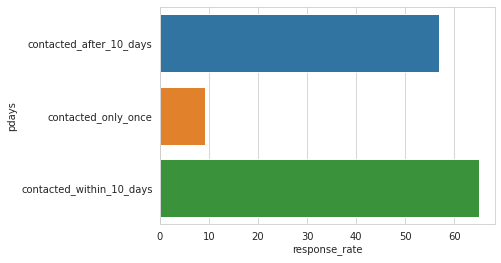

In [ ]:
# plot cohort performance
sns.barplot(data=cohort_pdays, x='response_rate', y='pdays')

- a follow up call increases conversion probability

---
### `previous`
- number of contacts performed before this campaign and for this client

In [ ]:
# preview feature distribution
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

- most of the prospects have never been contacted in the previous campaigns
- very few have been contacted more than thrice in previous campaigns

In [ ]:
df['previous'][df['previous'].isin([0])] = "never_contacted"
df['previous'][df['previous'].isin([1,2,3])] = "contacted_less_than_thrice"
df['previous'][df['previous'].isin([4,5,6,7])] = "contacted_more_than_thrice"

In [ ]:
df['previous'].value_counts()

never_contacted               35563
contacted_less_than_thrice     5531
contacted_more_than_thrice       94
Name: previous, dtype: int64

#### Cohort Analysis

In [ ]:
prospects_contacted_previous = df.groupby('previous')['response'].count().reset_index(name='prospects_contacted_previous')
prospects_responded_previous = df[df['response']==1].groupby('previous')['response'].count().reset_index(name='prospects_responded_previous')
cohort_previous = prospects_contacted_previous.merge(prospects_responded_previous, on='previous')
cohort_previous['response_rate'] = ((cohort_previous['prospects_responded_previous']/cohort_previous['prospects_contacted_previous'])*100).round(2)

In [ ]:
cohort_previous

previous  prospects_contacted_previous  \
0  contacted_less_than_thrice                          5531   
1  contacted_more_than_thrice                            94   
2             never_contacted                         35563   

   prospects_responded_previous  response_rate  
0                          1445          26.13  
1                            54          57.45  
2                          3141           8.83

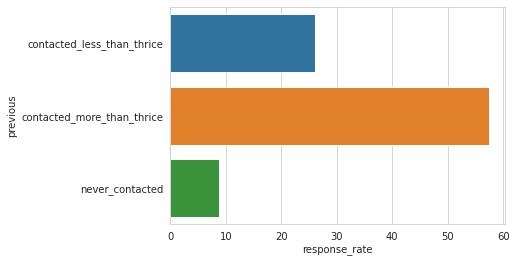

In [ ]:
sns.barplot(data=cohort_previous, x='response_rate', y='previous')

- more than three times has the highest conversion rate
- however, since more than three times has very little sample size hence the success rate cannot be statistically ascertained
- additionally, campaigns can overlap and it always helps in conversions

---
---
## Social and economic context attributes
1. ***emp.var.rate*** : employment variation rate - quarterly indicator (numeric)
2. ***cons.price.idx*** : consumer price index - monthly indicator (numeric)
3. ***cons.conf.idx*** : consumer confidence index - monthly indicator (numeric)
4. ***euribor3m*** : euribor 3 month rate - daily indicator (numeric)
5. ***nr.employed*** : number of employees - quarterly indicator (numeric)

---
### `emp.var.rate`
- employment variation rate 
- quarterly indicator

In [ ]:
# preview feature distribution
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

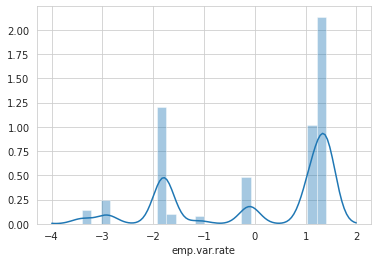

In [ ]:
# distribution plot
sns.distplot(df['emp.var.rate'])

- most of the calls were made in the positive employment variation rate

In [ ]:
# check distribution by percentiles
df['emp.var.rate'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

- most values are at around the 1.4 mark
- and there are no such outliers, therefore, we do not need to transform this feature into bins

In [ ]:
prospects_contacted_emp_var_rate = df.groupby('emp.var.rate')['response'].count().reset_index(name='prospects_contacted_emp_var_rate')
prospects_responded_emp_var_rate = df[df['response']==1].groupby('emp.var.rate')['response'].count().reset_index(name='prospects_responded_emp_var_rate')
cohort_emp_var_rate = prospects_contacted_emp_var_rate.merge(prospects_responded_emp_var_rate, on='emp.var.rate')
cohort_emp_var_rate['response_rate'] = ((cohort_emp_var_rate['prospects_responded_emp_var_rate']/cohort_emp_var_rate['prospects_contacted_emp_var_rate'])*100).round(2)

In [ ]:
cohort_emp_var_rate

emp.var.rate  prospects_contacted_emp_var_rate  \
0          -3.4                              1071   
1          -3.0                               172   
2          -2.9                              1663   
3          -1.8                              9184   
4          -1.7                               773   
5          -1.1                               635   
6          -0.2                                10   
7          -0.1                              3683   
8           1.1                              7763   
9           1.4                             16234   

   prospects_responded_emp_var_rate  response_rate  
0                               454          42.39  
1                                88          51.16  
2                               594          35.72  
3                              1461          15.91  
4                               403          52.13  
5                               301          47.40  
6                                 1          10.00  
7                               232           6.30  
8                               240           3.09  
9                               866           5.33

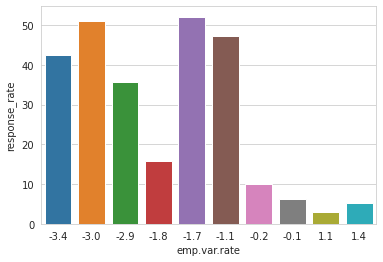

In [ ]:
sns.barplot(data=cohort_emp_var_rate, y='response_rate', x='emp.var.rate')

- the conversion rate increases when the employment variation is positive
- there are lesser calls made in negative periods, this could be due to lesser workforce of the bank in recession

---
### `cons.price.idx`
- consumer price index 
- follows the inflation rate
- monthly indicator

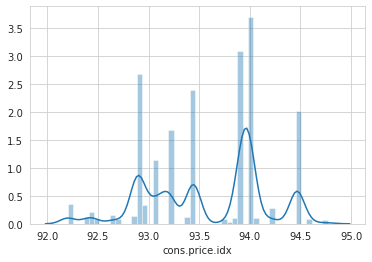

In [ ]:
sns.distplot(df['cons.price.idx'])

In [ ]:
df['cons.price.idx'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

---
### cons.conf.idx
- consumer confidence index 
- indicates how much confidence people have in the market and economy
- monthly indicator

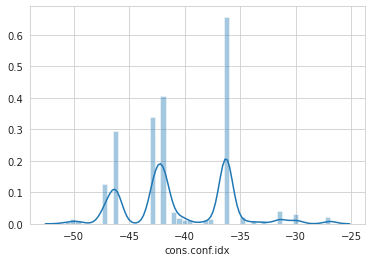

In [ ]:
sns.distplot(df['cons.conf.idx'])

In [ ]:
df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

- the negative values show less trust of people in the market

---
### euribor3m
- euribor 3 month rate 
- daily indicator
- when a bank borrows funds from another bank to pay off clients, the interest rate on that loan is indicated by this feature
- higher this measure, higher the interest rate charged

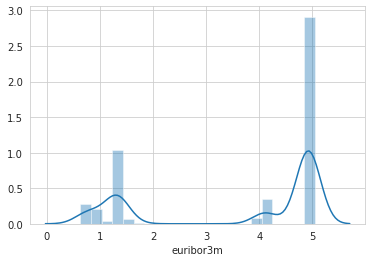

In [ ]:
sns.distplot(df['euribor3m'])

In [ ]:
df['euribor3m'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

In [ ]:
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1071
4.864    1044
4.960    1013
4.968     992
4.959     895
4.860     892
4.855     840
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     690
4.021     676
4.967     643
1.281     637
4.966     622
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
1.299     520
1.313     492
1.334     482
1.244     422
1.344     395
4.865     373
4.866     340
1.365     303
1.410     254
1.260     252
1.354     215
0.879     180
4.970     172
1.262     145
0.714     139
0.715     135
0.884     128
0.883     124
1.270     110
4.955     103
1.445     103
4.947      98
1.415      98
1.268      95
1.423      87
1.264      87
0.873      82
0.739      82
1.453      81
1.435      81
0.881      79
0.720      78
0.722      74
1.259      70
0.742      68
0.861      65
1.479      62
0.904      60
1.466      57
0.869      54
0.716      54
0.899 

### nr.employed
- number of employees 
- quarterly indicator

In [ ]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

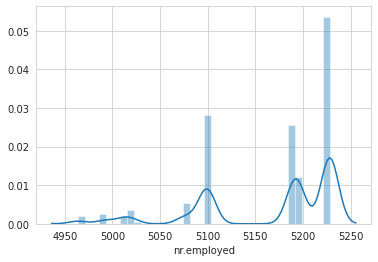

In [ ]:
sns.distplot(df['nr.employed'])

- more than 50% of the calls were made when number of employed was high

# Data Preparation

In [ ]:
# create a copy of the dataframe
df2 = df.copy()

In [ ]:
# explore features
for i in df.columns: print(i)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
response
age_bins


In [ ]:
# drop `age_bins`
df.drop(['age_bins'], inplace=True, axis=1)

In [ ]:
# create a list of categorical and numerical features
cat_features = []
num_features = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_features.append(i)
    else:
        num_features.append(i)

In [ ]:
# print all categorical features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'pdays',
 'previous',
 'poutcome']

In [ ]:
# print all numerical features
num_features

['age',
 'duration',
 'campaign',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'response']

- we have seen that `pdays` and `previous` are categorical features, therefore we will modify the above lists

In [ ]:
for i in cat_features:
  print(i)
  

job
marital
education
default
housing
loan
contact
month
day_of_week
pdays
previous
poutcome


In [ ]:
pd.get_dummies(trial_df, columns=new_list, drop_first=True)

NameError: ignored

In [ ]:
# create dummy variables for categorical features
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
df.head()

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56       261         1           1.1          93.994          -36.4   
1   57       149         1           1.1          93.994          -36.4   
2   37       226         1           1.1          93.994          -36.4   
3   40       151         1           1.1          93.994          -36.4   
4   56       307         1           1.1          93.994          -36.4   

   euribor3m  nr.employed  response  job_blue-collar  job_entrepreneur  \
0      4.857       5191.0         0                0                 0   
1      4.857       5191.0         0                0                 0   
2      4.857       5191.0         0                0                 0   
3      4.857       5191.0         0                0                 0   
4      4.857       5191.0         0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   
1              0               0            0                  0   
2              0               0            0                  0   
3              0               0            0                  0   
4              0               0            0                  0   

   job_services  job_student  job_technician  job_unemployed  job_unknown  \
0             0            0               0               0            0   
1             1            0               0               0            0   
2             1            0               0               0            0   
3             0            0               0               0            0   
4             1            0               0               0            0   

   marital_married  marital_single  education_professional.course  \
0                1               0                              0   
1                1               0                              0   
2                1               0                              0   
3                1               0                              0   
4                1               0                              0   

   education_secondary_education  education_tertiary_education  \
0                              0                             0   
1                              1                             0   
2                              1                             0   
3                              0                             0   
4                              1                             0   

   education_unknown  default_unknown  default_yes  housing_unknown  \
0                  0                0            0                0   
1                  0                1            0                0   
2                  0                0            0                0   
3                  0                0            0                0   
4                  0                0            0                0   

   housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
0            0             0         0                  1          0   
1            0             0         0                  1          0   
2            1             0         0                  1          0   
3            0             0         0                  1          0   
4            0             0         1                  1          0   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0 

In [ ]:
# size of dataset
print("# Rows:", df.shape[0])
print("# Cols:", df.shape[1])

# Rows: 41188
# Cols: 52


# Train Test Split
- split the dependent features from the target variables
- split dataset into train and test datasets

In [ ]:
# split the dependent features from the target variables
X = df.drop(['response'], axis=1)   # dependent features
y = df['response']                  # independent features

In [ ]:
# preview split datasets
X.head(3)

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56       261         1           1.1          93.994          -36.4   
1   57       149         1           1.1          93.994          -36.4   
2   37       226         1           1.1          93.994          -36.4   

   euribor3m  nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0      4.857       5191.0                0                 0              1   
1      4.857       5191.0                0                 0              0   
2      4.857       5191.0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   

   job_technician  job_unemployed  job_unknown  marital_married  \
0               0               0            0                1   
1               0               0            0                1   
2               0               0            0                1   

   marital_single  education_professional.course  \
0               0                              0   
1               0                              0   
2               0                              0   

   education_secondary_education  education_tertiary_education  \
0                              0                             0   
1                              1                             0   
2                              1                             0   

   education_unknown  default_unknown  default_yes  housing_unknown  \
0                  0                0            0                0   
1                  0                1            0                0   
2                  0                0            0                0   

   housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
0            0             0         0                  1          0   
1            0             0         0                  1          0   
2            1             0         0                  1          0   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   

   day_of_week_wed  pdays_contacted_only_once  pdays_contacted_within_10_days  \
0                0                          1                               0   
1                0                          1                               0   
2                0                          1                               0   

   previous_contacted_more_than_thrice  previous_never_contacted  \
0                                    0                         1   
1                                    0                         1   
2                                    0                         1   

   poutcome_nonexistent  poutcome_success  
0                     1                 0  
1                     1                 0  
2                     1                 0

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [ ]:
# split dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# preview split datasets
X_train.head(3)

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
7019    31       102         4           1.1          93.994          -36.4   
27175   51       218         3          -0.1          93.200          -42.0   
15817   39       333         3           1.4          93.918          -42.7   

       euribor3m  nr.employed  job_blue-collar  job_entrepreneur  \
7019       4.860       5191.0                0                 0   
27175      4.021       5195.8                0                 0   
15817      4.960       5228.1                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
7019               0               0            0                  0   
27175              0               0            0                  0   
15817              0               0            0                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
7019              0            0               0               0            0   
27175             0            0               1               0            0   
15817             0            0               0               0            0   

       marital_married  marital_single  education_professional.course  \
7019                 1               0                              0   
27175                0               1                              0   
15817                0               1                              0   

       education_secondary_education  education_tertiary_education  \
7019                               0                             1   
27175                              0                             0   
15817                              0                             1   

       education_unknown  default_unknown  default_yes  housing_unknown  \
7019                   0                0            0                0   
27175                  0                0            0                0   
15817                  0                0            0                0   

       housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
7019             1             0         0                  1          0   
27175            1             0         0                  1          0   
15817            0             0         0                  0          0   

       month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
7019           0          0          0          0          1          0   
27175          0          0          0          0          0          1   
15817          0          1          0          0          0          0   

       month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
7019           0          0                0                1   
27175          0          0                0                0   
15817          0          0                1                0   

       day_of_week_tue  day_of_week_wed  pdays_contacted_only_once  \
7019                 0                0                          1   
27175                0                0                          1   
15817                0                0                          1   

       pdays_contacted_within_10_days  previous_contacted_more_than_thrice  \
7019                                0                                    0   
27175                               0                                    0   
15817                               0                                    0   

       previous_never_contacted  poutcome_nonexistent  poutcome_success  
7019                          1                     1                 0  
27175                         1                     1                 0  
15817                         1                     1                 0

In [ ]:
X_test.head(3)

age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
33148   28        52         1          -1.8          92.893          -46.2   
27585   41       407         4          -0.1          93.200          -42.0   
15722   34       177         1           1.4          93.918          -42.7   

       euribor3m  nr.employed  job_blue-collar  job_entrepreneur  \
33148      1.291       5099.1                0                 0   
27585      4.021       5195.8                0                 0   
15722      4.960       5228.1                1                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
33148              0               0            0                  0   
27585              0               0            0                  0   
15722              0               0            0                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
33148             0            0               0               0            0   
27585             0            0               1               0            0   
15722             0            0               0               0            0   

       marital_married  marital_single  education_professional.course  \
33148                0               1                              0   
27585                1               0                              1   
15722                1               0                              0   

       education_secondary_education  education_tertiary_education  \
33148                              1                             0   
27585                              0                             0   
15722                              1                             0   

       education_unknown  default_unknown  default_yes  housing_unknown  \
33148                  0                0            0                0   
27585                  0                0            0                0   
15722                  0                0            0                0   

       housing_yes  loan_unknown  loan_yes  contact_telephone  month_aug  \
33148            1             0         1                  0          0   
27585            0             0         0                  0          0   
15722            0             0         1                  0          0   

       month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
33148          0          0          0          0          1          0   
27585          0          0          0          0          0          1   
15722          0          1          0          0          0          0   

       month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
33148          0          0                0                0   
27585          0          0                0                0   
15722          0          0                1                0   

       day_of_week_tue  day_of_week_wed  pdays_contacted_only_once  \
33148                1                0                          1   
27585                0                0                          1   
15722                0                0                          1   

       pdays_contacted_within_10_days  previous_contacted_more_than_thrice  \
33148                               0                                    0   
27585                               0                                    0   
15722                               0                                    0   

       previous_never_contacted  poutcome_nonexistent  poutcome_success  
33148                         1                     1                 0  
27585                         1                     1                 0  
15722                         1                     1                 0

In [ ]:
y_train.head(3)

7019     0
27175    0
15817    0
Name: response, dtype: int64

In [ ]:
y_test.head(3)

33148    0
27585    0
15722    0
Name: response, dtype: int64

## Standardization
- `(x - mean)/std_dev`
- cannot be applied to encoded features

In [ ]:
X_train.columns

Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_professional.course', 'education_secondary_education',
       'education_tertiary_education', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_contacted_only_once',
       'pdays_contacted_within_10_days', 'previous_contacted_more_than_thrice',
       'previous_never_contacted', 'pou

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# create copy of datasets
X_train_std = X_train.copy()
X_test_std = X_test.copy()

# numerical features
num_cols = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_std[[i]])  # we train standardScaler only on the train data since the model is trained on the train data
    
    # transform the training data column
    X_train_std[i] = scale.transform(X_train_std[[i]])
    
    # transform the testing data column
    X_test_std[i] = scale.transform(X_test_std[[i]])

In [ ]:
# preview scaled datasets
X_train_std.head(3)

age  duration  campaign  emp.var.rate  cons.price.idx  \
7019  -0.878700 -0.648994  0.646941      0.649769        0.723310   
27175  1.088859 -0.157560  0.213950     -0.114601       -0.650839   
15817 -0.091676  0.329637  0.213950      0.840862        0.591780   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
7019        0.891842   0.715460     0.333624                0   
27175      -0.319726   0.231941     0.400058                0   
15817      -0.471172   0.773091     0.847102                0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
7019                  0              0               0            0   
27175                 0              0               0            0   
15817                 0              0               0            0   

       job_self-employed  job_services  job_student  job_technician  \
7019                   0             0            0               0   
27175                  0             0            0               1   
15817                  0             0            0               0   

       job_unemployed  job_unknown  marital_married  marital_single  \
7019                0            0                1               0   
27175               0            0                0               1   
15817               0            0                0               1   

       education_professional.course  education_secondary_education  \
7019                               0                              0   
27175                              0                              0   
15817                              0                              0   

       education_tertiary_education  education_unknown  default_unknown  \
7019                              1                  0                0   
27175                             0                  0                0   
15817                             1                  0                0   

       default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
7019             0                0            1             0         0   
27175            0                0            1             0         0   
15817            0                0            0             0         0   

       contact_telephone  month_aug  month_dec  month_jul  month_jun  \
7019                   1          0          0          0          0   
27175                  1          0          0          0          0   
15817                  0          0          0          1          0   

       month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
7019           0          1          0          0          0                0   
27175          0          0          1          0          0                0   
15817          0          0          0          0          0                1   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
7019                 1                0                0   
27175                0                0                0   
15817                0                0                0   

       pdays_contacted_only_once  pdays_contacted_within_10_days  \
7019                           1                               0   
27175                          1                               0   
15817                          1                               0   

       previous_contacted_more_than_thrice  previous_never_contacted  \
7019                                     0                         1   
27175                                    0                         1   
15817                                    0                         1   

       poutcome_nonexistent  poutcome_success  
7019                      1                 0  
27175                     1                 0  
15817                     1                 0

In [ ]:
X_test_std.head(3)

age  duration  campaign  emp.var.rate  cons.price.idx  \
33148 -1.173834 -0.860819 -0.652032     -1.197458       -1.182153   
27585  0.105080  0.643138  0.646941     -0.114601       -0.650839   
15722 -0.583566 -0.331257 -0.652032      0.840862        0.591780   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
33148      -1.228402  -1.341372    -0.938309                0   
27585      -0.319726   0.231941     0.400058                0   
15722      -0.471172   0.773091     0.847102                1   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
33148                 0              0               0            0   
27585                 0              0               0            0   
15722                 0              0               0            0   

       job_self-employed  job_services  job_student  job_technician  \
33148                  0             0            0               0   
27585                  0             0            0               1   
15722                  0             0            0               0   

       job_unemployed  job_unknown  marital_married  marital_single  \
33148               0            0                0               1   
27585               0            0                1               0   
15722               0            0                1               0   

       education_professional.course  education_secondary_education  \
33148                              0                              1   
27585                              1                              0   
15722                              0                              1   

       education_tertiary_education  education_unknown  default_unknown  \
33148                             0                  0                0   
27585                             0                  0                0   
15722                             0                  0                0   

       default_yes  housing_unknown  housing_yes  loan_unknown  loan_yes  \
33148            0                0            1             0         1   
27585            0                0            0             0         0   
15722            0                0            0             0         1   

       contact_telephone  month_aug  month_dec  month_jul  month_jun  \
33148                  0          0          0          0          0   
27585                  0          0          0          0          0   
15722                  0          0          0          1          0   

       month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
33148          0          1          0          0          0                0   
27585          0          0          1          0          0                0   
15722          0          0          0          0          0                1   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
33148                0                1                0   
27585                0                0                0   
15722                0                0                0   

       pdays_contacted_only_once  pdays_contacted_within_10_days  \
33148                          1                               0   
27585                          1                               0   
15722                          1                               0   

       previous_contacted_more_than_thrice  previous_never_contacted  \
33148                                    0                         1   
27585                                    0                         1   
15722                                    0                         1   

       poutcome_nonexistent  poutcome_success  
33148                     1                 0  
27585                     1                 0  
15722                     1                 0

---
# Modelling
Since this is a classification problem, we will select the following classification models
1. Logistic Regression
2. Decision Tree
3. Random Forest

## Logistic Regression

In [ ]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm 

In [ ]:
# model training
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# preview Logistic Regression Model
log_m1 = sm.GLM(y_train, sm.add_constant(X_train_std), family=sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28781
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5781.4
Date:                Sun, 16 Aug 2020   Deviance:                       11563.
Time:                        14:58:26   Pearson chi2:                 1.92e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.7788      0.322     -8.630      0.000      -3.410      -2.148
age                                     0.0015      0.031      0.047      0.962      -0.059       0.062
duration                                1.2297      0.022     56.372      0.000       1.187       1.272
campaign                               -0.0757      0.034     -2.247      0.025      -0.142      -0.010
emp.var.rate                           -2.9480      0.267    -11.033      0.000      -3.472      -2.424
cons.price.idx                          1.2515      0.174      7.186      0.000       0.910       1.593
cons.conf.idx                           0.0747      0.043      1.735      0.083      -0.010       0.159
euribor3m                               0.7888      0.269      2.929      0.003       0.261       1.317
nr.employed                             0.3082      0.269      1.145      0.252      -0.219       0.836
job_blue-collar                        -0.2237      0.097     -2.309      0.021      -0.414      -0.034
job_entrepreneur                       -0.4473      0.158     -2.830      0.005      -0.757      -0.137
job_housemaid                           0.1256      0.172      0.728      0.467      -0.212       0.464
job_management                         -0.1612      0.106     -1.518      0.129      -0.369       0.047
job_retired                             0.3551      0.126      2.825      0.005       0.109       0.602
job_self-employed                      -0.1325      0.142     -0.934      0.350      -0.411       0.146
job_services                           -0.0505      0.102     -0.494      0.621      -0.251       0.150
job_student                             0.2950      0.135      2.192      0.028       0.031       0.559
job_technician                         -0.0577      0.087     -0.664      0.507      -0.228       0.113
job_unemployed                          0.0030      0.155      0.020      0.984      -0.300       0.306
job_unknown                             0.0149      0.269      0.055      0.956      -0.512       0.542
marital_married                         0.0005      0.083      0.006      0.995      -0.162       0.163
marital_single                          0.0630      0.095      0.662      0.508      -0.124       0.250
education_professional.course           0.1572      0.100      1.577      0.115      -0.038       0.353
education_secondary_education           0.0420      0.084      0.501      0.617      -0.122       0.206
education_tertiary_education            0.1919      0.085      2.256      0.024       0.025       0.359
education_unknown                       0.2427      0.124      1.952      0.051      -0.001       0.486
default_unknown                        -0.3517      0.082     -4.27

Let's use PCA for feature selection

## Principal Component Analysis
- for filtering our the unneccessarry features from the model

In [ ]:
# pca imports
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
# other imports
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pca = PCA()
pca.fit(X_train_std)
churn_pca = pca.fit_transform(X_train)

In [ ]:
pd.Series(pca.explained_variance_ratio_.cumsum()*100)

0      91.245005
1      99.779492
2      99.949502
3      99.983692
4      99.992181
5      99.993612
6      99.994251
7      99.994759
8      99.995196
9      99.995605
10     99.995967
11     99.996314
12     99.996652
13     99.996987
14     99.997315
15     99.997635
16     99.997940
17     99.998176
18     99.998387
19     99.998596
20     99.998773
21     99.998904
22     99.999011
23     99.999107
24     99.999200
25     99.999284
26     99.999359
27     99.999432
28     99.999504
29     99.999566
30     99.999623
31     99.999678
32     99.999726
33     99.999772
34     99.999812
35     99.999844
36     99.999875
37     99.999901
38     99.999922
39     99.999942
40     99.999957
41     99.999969
42     99.999979
43     99.999986
44     99.999991
45     99.999995
46     99.999997
47    100.000000
48    100.000000
49    100.000000
50    100.000000
dtype: float64

- 90% of the variance is being captured at 16 features
- therefore, we can select the best 16 features for our modelling

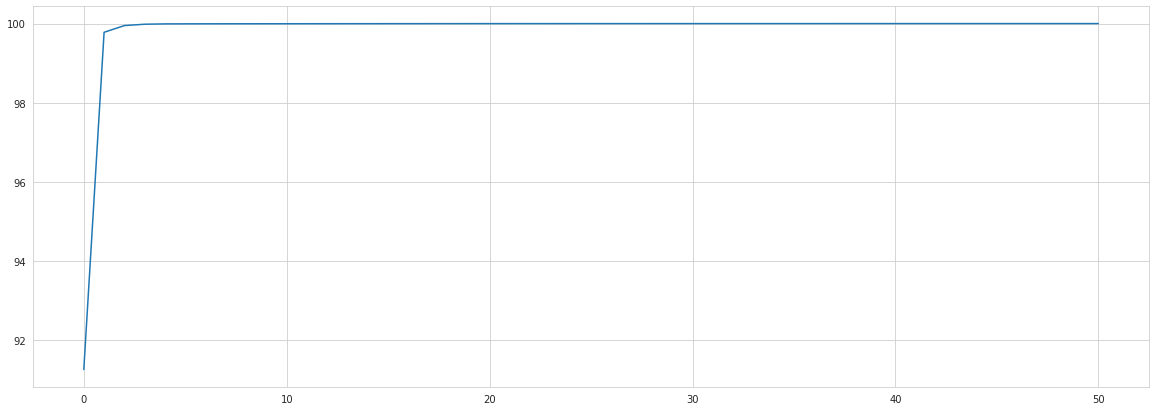

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = (pca.explained_variance_ratio_.cumsum()*100)
plt.figure(figsize=(20,7))
plt.plot(cumulative_variance)

In [ ]:
# create pipeline
PCA_VARS = 16
steps = [("pca", PCA(n_components=PCA_VARS)), ("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

In [ ]:
# fit model
pipeline.fit(X_train_std, y_train)

# evaluate pipeline on train data
pipeline.score(X_train_std, y_train)  # accuracy score

0.851860844230169

In [ ]:
# predict churn on test data
y_pred = pipeline.predict(X_test_std)

# model evaluation > create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(f"Sensitivity:\t{sensitivity.round(2)}\nSpecificity:\t{specificity.round(2)}", sep="")

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:,1]
print(f"AUC:\t{roc_auc_score(y_test, y_pred_prob).round(2)}")

Confusion Matrix:
[[9325 1650]
 [ 170 1212]]
Sensitivity:	0.88
Specificity:	0.85
AUC:	0.5


- while we have 85% accuracy but we have very low precision
- let us explore more with different models

In [ ]:
# class imbalance
y_train.value_counts()/y_train.shape[0]

0    0.886997
1    0.113003
Name: response, dtype: float64

In [ ]:
# grid search for the best parameters

# PCA
pca = PCA()

# logisitic regression
logistic = LogisticRegression(class_weight='balanced')  # class weight adjust the cost function for the imbalanced dataset

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {
    "pca__n_components":[16,17,18,19,20],
    "logistic__C":[0.1,0.5,1,2,3,4,5,10],
    "logistic__penalty":['l1', 'l2']
}

# create folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [ ]:
# fit model
model.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [ ]:
# best parameters
print("Best AUC:", model.best_score_)
print("Best Hyperparameters:", model.best_params_)

Best AUC: 0.9305702182157644
Best Hyperparameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 18}


Let us see if there are any improvements in the model prediction after hyperparmeter tuning

In [ ]:

# predict churn on test dataset
y_pred = model.predict(X_test_std)

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensistivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average="binary")
print(f"Sensitivity:\t{sensistivity.round(2)}")
print(f"Specificity:\t{specificity.round(2)}")

# check area under curve
y_pred_prob = model.predict_proba(X_test_std)[:,1]
print("AUC:\t", round(roc_auc_score(y_test, y_pred_prob), 2))

[[9308 1667]
 [ 172 1210]]
Sensitivity:	0.88
Specificity:	0.85
AUC:	 0.93


- There are no significant improvements with the model
- Let us explore prediction with other algorithms

## Decision Tree Classifier

In [ ]:
# imports
from sklearn.tree import DecisionTreeClassifier

# train model with default parameters
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# make predictions
y_pred = dt_clf.predict(X_test_std)

# classification report
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10975
           1       0.64      0.46      0.54      1382

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357

Confusion Matrix:
[[10620   355]
 [  740   642]]


- Precision is decent however the recall is not that great
- let us fine tune the parameters for the DT model

### Tune Decision Tree Hyperparameters
We will use Grid Search CV to fine tune the following parameters
- Maximum Depth
- Minimum Samples Leaf
- Minimum Samples Split
- Criterion

In [ ]:
# parameter grid
param_grid = {
    "max_depth": range(5,15,5),
    "min_samples_leaf": range(50,150,50),
    "min_samples_split": range(50,150,50),
    "criterion": ["entropy","gini"]
}

n_folds = 5

# grid search model
dt_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=n_folds, verbose=1)

# fit the grid search on data
grid_search.fit(X_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [ ]:
# grid search cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.076662      0.003594         0.003569        0.000449   
1        0.074327      0.001551         0.003276        0.000158   
2        0.071954      0.000465         0.003309        0.000331   
3        0.074445      0.001474         0.003336        0.000120   
4        0.105319      0.003079         0.003333        0.000215   
5        0.108983      0.005639         0.003660        0.000118   
6        0.099002      0.002628         0.003734        0.000697   
7        0.099650      0.002132         0.003924        0.000444   
8        0.065047      0.001095         0.003194        0.000261   
9        0.066228      0.002744         0.003157        0.000208   
10       0.065944      0.002173         0.003099        0.000273   
11       0.063700      0.001119         0.002993        0.000053   
12       0.102484      0.002376         0.003660        0.000069   
13       0.101152      0.002790         0.003380        0.000151   
14       0.099488      0.006000         0.003579        0.000128   
15       0.091358      0.002691         0.003173        0.000117   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.912433           0.915539           0.910683   
1            0.912433           0.915539           0.910683   
2            0.913300           0.914672           0.912591   
3            0.913300           0.914672           0.912591   
4            0.910179           0.914672           0.911724   
5            0.910179           0.914672           0.

In [ ]:
# optimal accuracy score and hyperparameters
print(f"Best Accuracy: {grid_search.best_score_.round(2)}")
print(grid_search.best_estimator_)

Best Accuracy: 0.91
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Best parameters
- max_depth=10
- max_leaf_nodes=None
- min_samples_leaf=50
- min_samples_split=50
- criterion='gini'

We will train our model on these parameters

In [ ]:
# model training with best parameters
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
# accuracy score
dt_clf_gini.score(X_test_std, y_test)

0.8881605567694424

- Accuracy has dropped after hyperparameter tuning
- However, we should give more emphasis to precision and recall values

In [ ]:
# make predictions
y_pred = dt_clf_gini.predict(X_test_std)

# classification report
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10975
           1       0.00      0.00      0.00      1382

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357

Confusion Matrix:
[[10975     0]
 [ 1382     0]]


In [ ]:
# visualize the decision tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

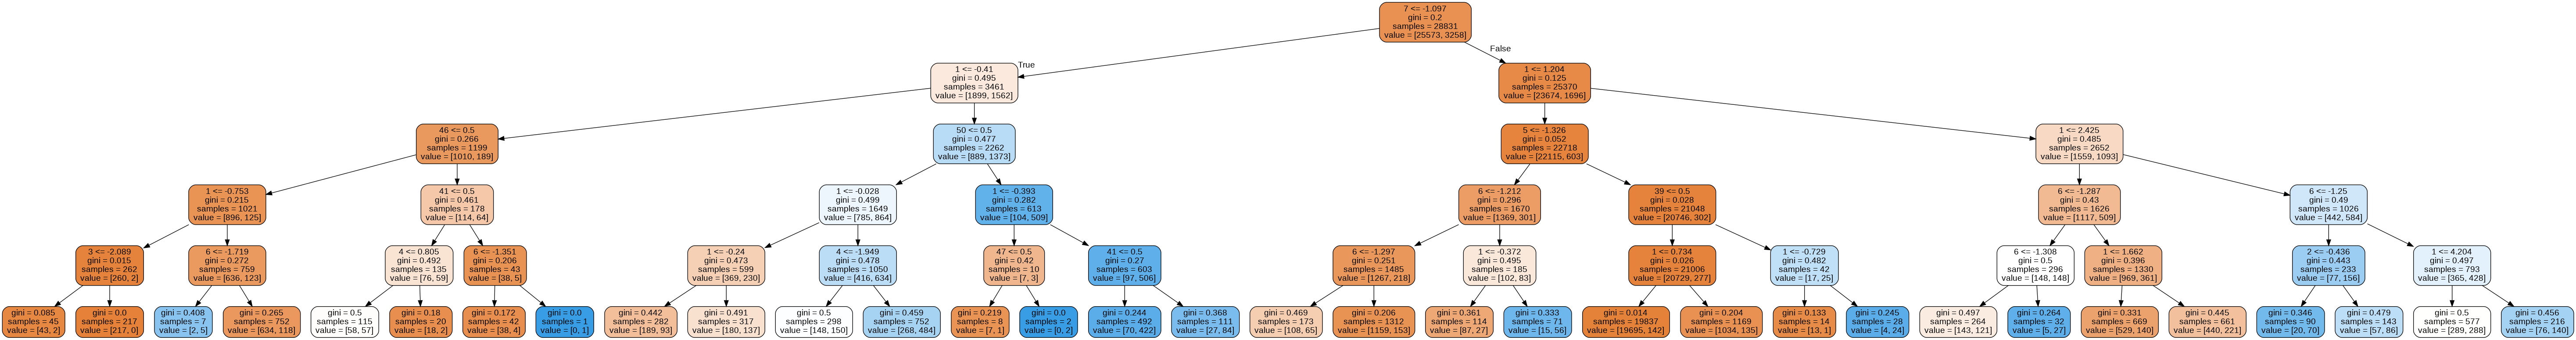

In [ ]:
# plot decision tree
dot_data = StringIO()  
export_graphviz(dt_clf, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

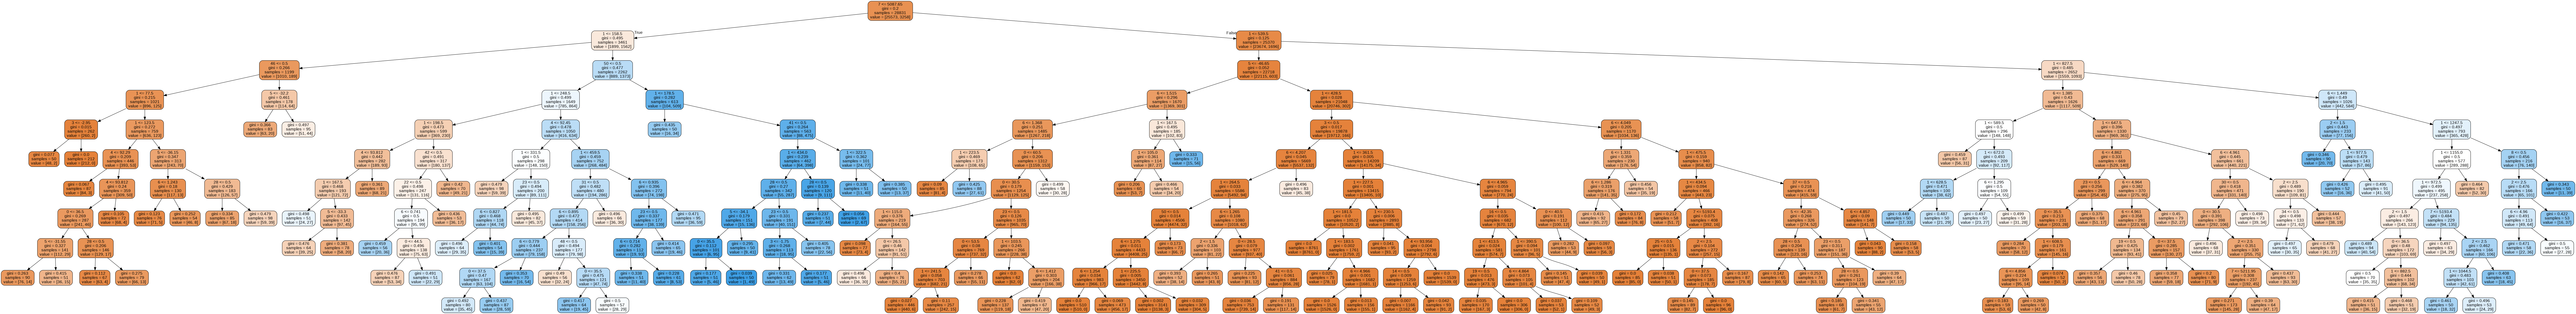

In [ ]:
# plot decision tree
dot_data = StringIO()  
export_graphviz(dt_clf_gini, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# DT Pruning
dt_clf_gini_3 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

# model training
dt_clf_gini_3.fit(X_train_std, y_train)

# accuracy score
dt_clf_gini_3.score(X_test_std, y_test)

0.9060451565914057

We can observe some improvement in the accuracy

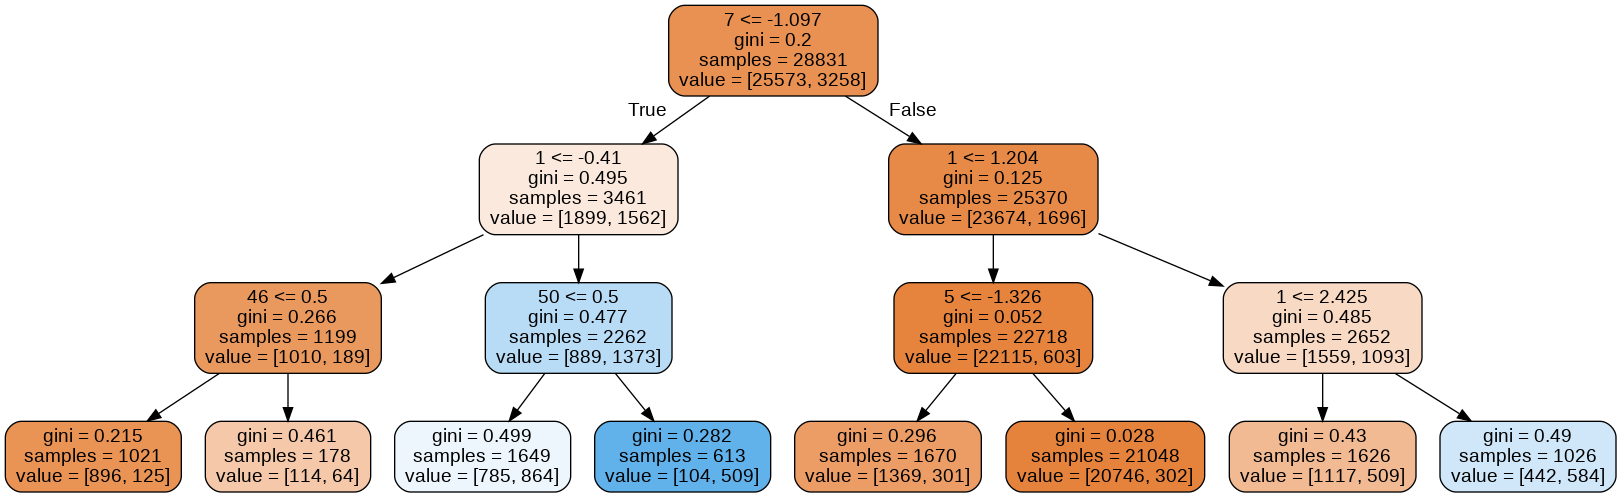

In [ ]:
# plot decision tree
dot_data = StringIO()  
export_graphviz(dt_clf_gini_3, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# make predictions
y_pred = dt_clf_gini_3.predict(X_test_std)

# classification report
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10975
           1       0.58      0.59      0.58      1382

    accuracy                           0.91     12357
   macro avg       0.76      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357

Confusion Matrix:
[[10378   597]
 [  564   818]]


- significant development over previous models

In [ ]:
# check sensitivity, specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(f"Sensitivity: {sensitivity.round(2)}")
print(f"Specificity: {specificity.round(2)}")

Sensitivity: 0.59
Specificity: 0.95


## Random Forest


In [ ]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model init
rc_clf = RandomForestClassifier()

In [ ]:
# model train
rc_clf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# best hyperparameters - simple model
print(f"Best AUC: {model.best_score_.round(2)}")
print(f"Best Hyperparameters: {model.best_params_}")

Best AUC: 0.93
Best Hyperparameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 18}


In [ ]:
# model predictions
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Accuracy Score:\t{accuracy_score(y_test, y_pred).round(2)}")

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10975
           1       0.00      0.00      0.00      1382

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357

Confusion Matrix:
[[10975     0]
 [ 1382     0]]

Accuracy Score:	0.89


#### Hyperparamter Tuning
- number of trees (estimators)
- max depth
- max sample leafs
- max samples split
- max features

In [ ]:
# create parameter grid
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    'max_features': [5,10]
}

# create model
rf = RandomForestClassifier()

# grid init
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
    )

In [ ]:
# fit grid search
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# optimal accuracy score and hyperparameters
print(f"We can achieve an accuracy of {grid_search.best_score_.round(2)} using {grid_search.best_params_}")

We can achieve an accuracy of 0.91 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [ ]:
# create model with best parameters
from sklearn.ensemble import RandomForestClassifier
rf_clf_grid = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=100,
    min_samples_split=200,
    max_features=10,
    n_estimators=300
)

In [ ]:
# model train
rf_clf_grid.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# model predictions
y_pred = rf_clf_grid.predict(X_test_std)

In [ ]:
# model evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10975
           1       0.70      0.28      0.40      1382

    accuracy                           0.91     12357
   macro avg       0.81      0.63      0.68     12357
weighted avg       0.89      0.91      0.89     12357

Confusion Matrix:
[[10808   167]
 [  990   392]]


In [ ]:
pred_prob = pd.DataFrame(pd.Series(y_pred_prob), columns=['pred_prob'])

In [ ]:
decile_df = pd.concat([pd.DataFrame(y_test).reset_index(), pred_prob], ignore_index=True, axis=1)
decile_df.drop(0, inplace=True, axis=1)
decile_df.rename({1:"actual",2:"pred_prob"}, axis=1, inplace=True)
decile_df['predicted'] = decile_df['pred_prob'].map(lambda x: 1 if x>0.5 else 0)

In [ ]:
decile_df

actual  pred_prob  predicted
0           0   0.107882          0
1           0   0.411411          0
2           0   0.041563          0
3           1   0.890800          1
4           0   0.023672          0
5           1   0.927644          1
6           0   0.062338          0
7           0   0.015413          0
8           0   0.098468          0
9           0   0.047122          0
10          1   0.597236          1
11          0   0.072726          0
12          0   0.084498          0
13          0   0.075805          0
14          0   0.038711          0
15          0   0.545655          1
16          0   0.020921          0
17          0   0.055758          0
18          0   0.040669          0
19          0   0.072827          0
20          0   0.071473          0
21          0   0.652763          1
22          0   0.015280          0
23          0   0.649536          1
24          0   0.150982          0
25          0   0.038843          0
26          0   0.049445          0
27          0   0.057234          0
28          0   0.930401          1
29          0   0.323425          0
30          0   0.551604          1
31          0   0.014715          0
32          0   0.083820          0
33          0   0.195690          0
34          0   0.293723          0
35          0   0.061520          0
36          0   0.073644          0
37          0   0.304215          0
38          0   0.067680          0
39          0   0.448420          0
40          1   0.615318          1
41          0   0.030862          0
42          1   0.992271          1
43          0   0.064284          0
44          0   0.022830          0
45          1   0.958921          1
46          0   0.130039          0
47          0   0.047278          0
48          0   0.034524          0
49          0   0.066848          0
50          0   0.043475          0
51          0   0.269009          0
52          1   0.949587          1
53          0   0.049575          0
54          0   0.553485          1
55          1   0.821804          1
56          0   0.025632          0
57          0   0.119412          0
58          1   0.982597          1
59          0   0.154490          0
60          0   0.153802          0
61          1   0.921012          1
62          0   0.489634          0
63          0   0.846472          1
64          0   0.415521          0
65          0   0.711155          1
66          0   0.835465          1
67          0   0.130158          0
68          0   0.312154          0
69          1   0.460901          0
70          0   0.090952          0
71          0   0.043179          0
72          0   0.822846          1
73          0   0.085686          0
74          0   0.116203          0
75          0   0.095124          0
76          0   0.109839          0
77          0   0.347437          0
78          0   0.044742          0
79          0   0.607505          1
80          0   0.141347          0
81          0   0.050903          0
82          0   0.019385          0
83          0   0.106383          0
84          1   0.355251          0
85          0   0.061291          0
86          0   0.544148          1
87          0   0.032058          0
88          0   0.147792          0
89          0   0.212173          0
90          0   0.107036          0
91          0   0.050450          0
92          0   0.026979          0
93          1   0.957630          1
94          0   0.030470          0
95          0   0.041998          0
96          0   0.607235          1
97          0   0.570959          1
98          0   0.022695          0
99          0   0.163732          0
100         0   0.462985          0
101         0   0.043227          0
102         0   0.016128          0
103         0   0.090448          0
104         0   0.033915          0
105         0   0.065846          0
106         0   0.983080          1
107         0   0.132030          0
108         0   0.030900          0
109         0   0.169698          0
110        

In [ ]:
# sort
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10,0,-1))
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()
lift_df_final = lift_df.merge(lift_df_pred, on='decile')
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final['cum_resp'] = lift_df_final['actual'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cum_resp']/sum(lift_df_final['actual']))
lift_df_final['cum_lift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [ ]:
lift_df_final

decile  total  actual  cum_resp        gain  cum_lift
9      1   1236     758       758   54.848046  5.484805
8      2   1236     374      1132   81.910275  4.095514
7      3   1235     181      1313   95.007236  3.166908
6      4   1236      43      1356   98.118669  2.452967
5      5   1235      13      1369   99.059334  1.981187
4      6   1236      10      1379   99.782923  1.663049
3      7   1236       1      1380   99.855282  1.426504
2      8   1235       2      1382  100.000000  1.250000
1      9   1236       0      1382  100.000000  1.111111
0     10   1236       0      1382  100.000000  1.000000

### Gain chart
- It plots the responders captured against the number of prospects targeted.
- It tells us the number of responders captured (y-axis) as a function of the number of prospects targeted (x-axis).
- Example: In the 4th decile (40% people targeted), we can capture about 99% of the responders.

### Lift chart
- It compares the response rate with and without using the model.
- Compares the ‘lift in response rate’ you will get using the model viz-à-viz when you target the entire population (without using the model)
- Contains lift (on y-axis) and the number of prospects targeted (on x-axis)
- Example: Our original response rate is about 11.7% (called the baseline); if at the 4th decile on the x-axis you get a lift of 5, it means that you can get 5 x 11.7% the response rate by targeting 40% prospects using the model.

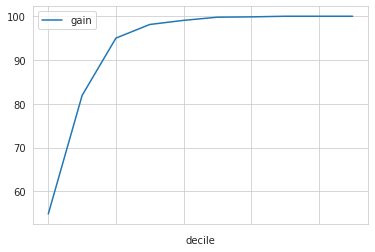

In [ ]:
# gain chart
lift_df_final.plot.line(x='decile', y='gain')

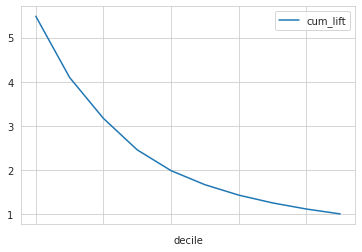

In [ ]:
# lift chart
lift_df_final.plot.line(x='decile',y='cum_lift')

# Summary
- You can attain 95% of total conversions by targeting only 30% of the total client base.
- This can be used in cost optimization
- Depending on cost per call, we can determine, how many people should be part of the tele marketing campaign